In [41]:
import json
import logging

from rdkit import RDLogger
from rdkit import Chem
from rdkit.Chem.rdChemReactions import ReactionFromSmarts

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
# Set the logging level for the PIL library to WARNING to suppress DEBUG logs
pil_logger = logging.getLogger('PIL')
pil_logger.setLevel(logging.WARNING)
# Suppress RDKit errors
RDLogger.EnableLog('rdApp.debug')         # enable debug channel

path = '../../syndirella/constants/RXN_SMIRKS_CONSTANTS.json'
with open(path, 'r') as file:
    smirks = json.load(file)

[OH]-[#6&X4:1].[NX3;H2,H1;!$(NC=O):2]>>[NX3;!$(NC=O):2]-[#6&X4:1]


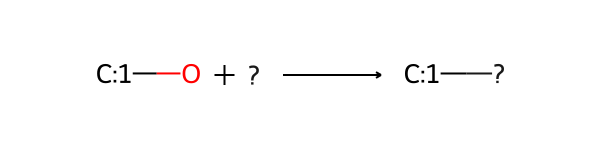

In [42]:
smirks_rxn = smirks['Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol']['smirks']
rxn = ReactionFromSmarts(smirks_rxn)
print(smirks_rxn)
rxn

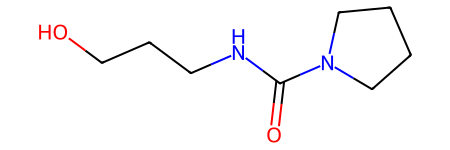

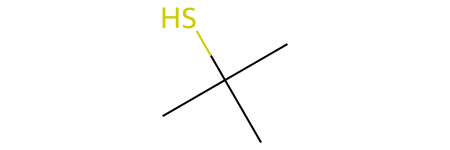

In [64]:
r1 = Chem.MolFromSmiles('O=C(NCCCO)N1CCCC1')
r2 = Chem.MolFromSmiles('CC(C)(C)S')
display(r1)
display(r2)

[OH]-[#6&X4:1].[*;$([NX3;H2,H1;!$(NC=O)]),$([SX2]):2]>>[*;$([NX3]),$([SX2]):2]-[#6&X4:1]


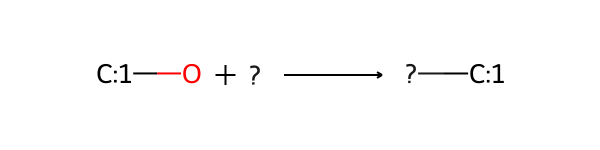

In [68]:
new_smirks = '[OH]-[#6&X4:1].[*;$([NX3;H2,H1;!$(NC=O)]),$([SX2]):2]>>[*;$([NX3]),$([SX2]):2]-[#6&X4:1]'
rxn = ReactionFromSmarts(new_smirks)
print(new_smirks)
rxn

In [69]:
g1 = Chem.MolFromSmarts('[OH]-[#6&X4:1]')
g2 = Chem.MolFromSmarts('[*;$([NX3;H2,H1;!$(NC=O)]),$([SX2]):2]')
display(r1.HasSubstructMatch(g1))
display(r2.HasSubstructMatch(g2))

True

True

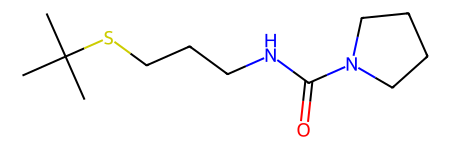

In [70]:
# add verbose readout?
prods = rxn.RunReactants((r1, r2))
for prod in prods:
    for p in prod:
        display(p)


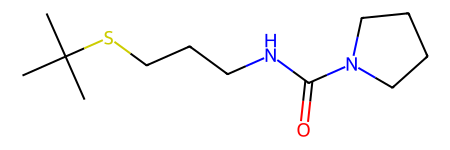

In [71]:
prod = Chem.MolFromSmiles('CC(C)(C)SCCCNC(=O)N1CCCC1')
display(prod)


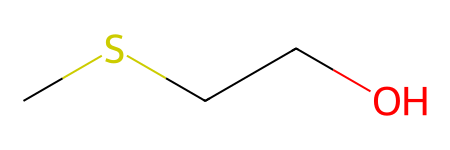

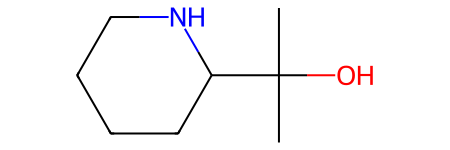

In [72]:
r1 = Chem.MolFromSmiles('CSCCO')
r2 = Chem.MolFromSmiles('CC(C)(O)C1CCCCN1')
display(r1)
display(r2)


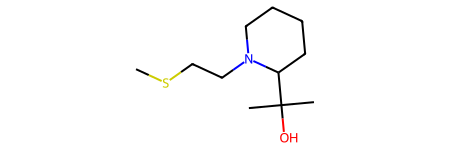

In [75]:
# add verbose readout?
prods = rxn.RunReactants((r1, r2))
for prod in prods:
    for p in prod:
        display(p)


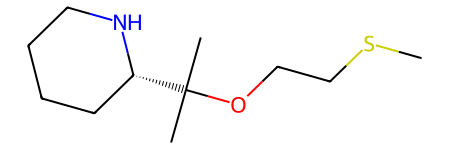

In [74]:
prod = Chem.MolFromSmiles('CSCCOC(C)(C)[C@@H]1CCCCN1')
prod

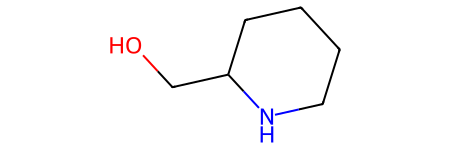

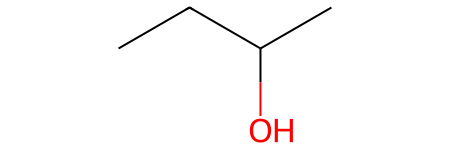

In [76]:
r1 = Chem.MolFromSmiles('OCC1CCCCN1')
r2 = Chem.MolFromSmiles('CCC(C)O')
display(r1)
display(r2)


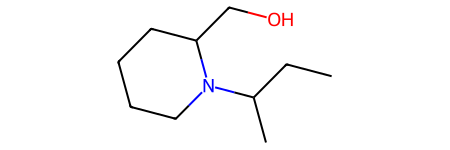

In [77]:
# add verbose readout?
prods = rxn.RunReactants((r2, r1))
for prod in prods:
    for p in prod:
        display(p)

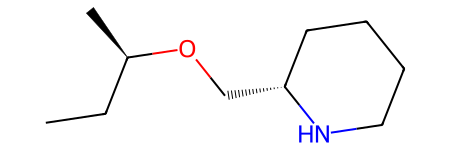

In [78]:
prod = Chem.MolFromSmiles('CC[C@@H](C)OC[C@@H]1CCCCN1')
prod